<a href="https://colab.research.google.com/github/erikamarchi/data-visualization-explorando-com-seaborn/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#dataset

In [3]:
import pandas as pd

In [11]:
dados = pd.read_csv('tips.csv')

In [6]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [13]:
gorjetas = dados.rename(columns={'total_bill':'valor_da_conta',
              'tip':'gorjeta',
              'dessert':'sobremesa',
              'day':'dia_da_semana',
              'time':'hora_do_dia',
              'size':'total_de_pessoas'})
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [14]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
gorjetas.sobremesa.replace({'Yes':'Sim',
                            'No':'Não'}, inplace=True)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [17]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [19]:
gorjetas.dia_da_semana.replace({'Sun':'Domingo',
                                'Sat':'Sábado',
                                'Thur':'Quinta',
                                'Fri':'Sexta'}, inplace=True)
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
gorjetas.hora_do_dia.replace({'Dinner':'Jantar',
                                'Lunch':'Almoço'}, inplace=True)
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [22]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#import do seaborn

In [23]:
import seaborn as sns

#Valor da conta e gorjeta

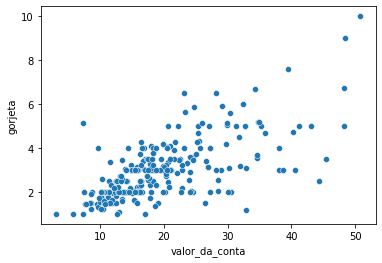

In [25]:
sns.scatterplot(x='valor_da_conta',
                y='gorjeta',
                data = gorjetas);

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [26]:
gorjetas.shape

(244, 6)

In [28]:
print(f'A base de dados contém {gorjetas.shape[0]} registros. \n')
print(f'Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros. 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

##Criando campo porcentagem

In [31]:
gorjetas['porcentagem'] = (gorjetas.gorjeta/gorjetas.valor_da_conta).round(2)

In [32]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


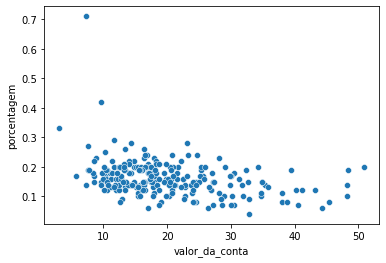

In [34]:
sns.scatterplot(x='valor_da_conta',
                y='porcentagem',
                data=gorjetas);

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**